## Author: Abdelaziz Neamatallah
## Date: 16.12.25
### Description: This notebook explains in details the steps for implementing data mining project

In [26]:
# 1. import important libraries
import pandas as pd
import sklearn 

### Understanding of the datasets
- Before we start working with any dataset, we must first understand how is it structured, and what is the meaning of each column, and which column is the target or the predicition.
#### 1. Iris:
- So Iris is a dataset for multiclass classification with 150 samples and 4 features. 
- The goal is to classify the samples into 3 species of iris
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica
- Four features are as follow:
  1. Sepal length
  2. Sepal width
  3. Petal length
  4. Petal width
- all of them are in terms of cm, and none of them has missing values.


#### 2. Breast Cancer
- Binary classification dataset with 569 samples and 30 features extracted from cell images. 
- The goal is to predict whether a tumor is benign (B = 0) or malignant (M = 1)
- It has 30 features: 

| Variable Name          | Role   | Type        | Description | Units | Missing Values |
|------------------------|--------|-------------|-------------|-------|----------------|
| ID                     | ID     | Categorical |             |       | no             |
| Diagnosis              | Target | Categorical |             |       | no             |
| radius1                | Feature| Continuous  |             |       | no             |
| texture1               | Feature| Continuous  |             |       | no             |
| perimeter1             | Feature| Continuous  |             |       | no             |
| area1                  | Feature| Continuous  |             |       | no             |
| smoothness1            | Feature| Continuous  |             |       | no             |
| compactness1           | Feature| Continuous  |             |       | no             |
| concavity1             | Feature| Continuous  |             |       | no             |
| concave_points1        | Feature| Continuous  |             |       | no             |
| symmetry1              | Feature| Continuous  |             |       | no             |
| fractal_dimension1     | Feature| Continuous  |             |       | no             |
| radius2                | Feature| Continuous  |             |       | no             |
| texture2               | Feature| Continuous  |             |       | no             |
| perimeter2             | Feature| Continuous  |             |       | no             |
| area2                  | Feature| Continuous  |             |       | no             |
| smoothness2            | Feature| Continuous  |             |       | no             |
| compactness2           | Feature| Continuous  |             |       | no             |
| concavity2             | Feature| Continuous  |             |       | no             |
| concave_points2        | Feature| Continuous  |             |       | no             |
| symmetry2              | Feature| Continuous  |             |       | no             |
| fractal_dimension2     | Feature| Continuous  |             |       | no             |
| radius3                | Feature| Continuous  |             |       | no             |
| texture3               | Feature| Continuous  |             |       | no             |
| perimeter3             | Feature| Continuous  |             |       | no             |
| area3                  | Feature| Continuous  |             |       | no             |
| smoothness3            | Feature| Continuous  |             |       | no             |
| compactness3           | Feature| Continuous  |             |       | no             |
| concavity3             | Feature| Continuous  |             |       | no             |
| concave_points3        | Feature| Continuous  |             |       | no             |
| symmetry3              | Feature| Continuous  |             |       | no             |
| fractal_dimension3     | Feature| Continuous  |             |       | no             |



In [27]:
# 2. load datasets

## 2.1 iris data from ./datasets/iris/bezdekIris.data
iris_data = pd.read_csv('./datasets/iris/iris.data', header=None)
print(iris_data.head())

# extract labels from column 4
iris_labels = iris_data[4]
iris_training_data = iris_data.drop(columns=[4])

print(iris_training_data.head())
print(iris_labels.head())

# print unique labels
print(f'Unique labels: {iris_labels.unique()}')


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 4, dtype: object
Unique labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [28]:
# 2.2 Breast cancer wisconsin dataset
breast_cancer_data = pd.read_csv('./datasets/breast_cancer/wdbc.data', header=None)
print(breast_cancer_data.head())

# extract labels from column 1
bc_labels = breast_cancer_data[1]
bc_training_data = breast_cancer_data.drop(columns=[1])
print(bc_training_data.head())
print(bc_labels.head())
# print unique labels
print(f'Unique labels: {bc_labels.unique()}')


         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

### 1. Experiment with skikit-learn KNN library

In [29]:
# Use sklearn to split the datasets into training and testing sets
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(
    iris_training_data, iris_labels, test_size=0.2, random_state=42)
bc_X_train, bc_X_test, bc_y_train, bc_y_test = train_test_split(
    bc_training_data, bc_labels, test_size=0.2, random_state=42)
print(f'Iris training set size: {iris_X_train.shape}, test set size: {iris_X_test.shape}')
print(f'Breast cancer training set size: {bc_X_train.shape}, test set size: {bc_X_test.shape}')


Iris training set size: (120, 4), test set size: (30, 4)
Breast cancer training set size: (455, 31), test set size: (114, 31)


In [30]:
# 3. Train KNN classifier on both datasets and evaluate accuracy
# Iris dataset
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import GridSearchCV
# Use gridsearch to try different k values and find the best one
param_grid = {'n_neighbors': list(range(2, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
start_time = time.time()
grid_search.fit(iris_X_train, iris_y_train)
training_time = time.time() - start_time
print(f'Iris dataset KNN training time: {training_time} seconds')

# assign best estimator
iris_knn = grid_search.best_estimator_
print(f'Iris dataset KNN best k: {iris_knn.n_neighbors}')

# Evaluate on test set
start_time = time.time()
iris_accuracy = iris_knn.score(iris_X_test, iris_y_test)
evaluation_time = time.time() - start_time
print(f'Iris dataset KNN evaluation time: {evaluation_time} seconds')
print(f'Iris dataset KNN accuracy: {iris_accuracy}')


Iris dataset KNN training time: 0.5225708484649658 seconds
Iris dataset KNN best k: 3
Iris dataset KNN evaluation time: 0.0025930404663085938 seconds
Iris dataset KNN accuracy: 1.0


In [31]:
# Breast cancer dataset
# Use gridsearch to try different k values and find the best one
param_grid = {'n_neighbors': list(range(2, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
start_time = time.time()
grid_search.fit(bc_X_train, bc_y_train)
training_time = time.time() - start_time
print(f'Breast cancer dataset KNN training time: {training_time} seconds')

# assign best estimator
print(f'Breast cancer dataset KNN best k: {grid_search.best_estimator_.n_neighbors}')
bc_knn = grid_search.best_estimator_

# Evaluate on test set
start_time = time.time()
bc_accuracy = bc_knn.score(bc_X_test, bc_y_test)
evaluation_time = time.time() - start_time
print(f'Breast cancer dataset KNN evaluation time: {evaluation_time} seconds')
print(f'Breast cancer dataset KNN accuracy: {bc_accuracy}')

Breast cancer dataset KNN training time: 0.9409780502319336 seconds
Breast cancer dataset KNN best k: 3
Breast cancer dataset KNN evaluation time: 0.006291866302490234 seconds
Breast cancer dataset KNN accuracy: 0.7631578947368421


In [32]:
# Compute confusion matrix for both datasets
# Iris dataset
from sklearn.metrics import confusion_matrix
iris_y_pred = iris_knn.predict(iris_X_test)
iris_cm = confusion_matrix(iris_y_test, iris_y_pred)

print('Iris dataset confusion matrix:')
print(iris_cm)

# print percision, recall, f1-score
from sklearn.metrics import classification_report
print('Iris dataset classification report:')
print(classification_report(iris_y_test, iris_y_pred))



Iris dataset confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Iris dataset classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [33]:
# For breast cancer dataset
bc_y_pred = bc_knn.predict(bc_X_test)
bc_cm = confusion_matrix(bc_y_test, bc_y_pred)
print('Breast cancer dataset confusion matrix:')
print(bc_cm)
print('Breast cancer dataset classification report:')
print(classification_report(bc_y_test, bc_y_pred))


Breast cancer dataset confusion matrix:
[[59 12]
 [15 28]]
Breast cancer dataset classification report:
              precision    recall  f1-score   support

           B       0.80      0.83      0.81        71
           M       0.70      0.65      0.67        43

    accuracy                           0.76       114
   macro avg       0.75      0.74      0.74       114
weighted avg       0.76      0.76      0.76       114



### 2. Experiment with custom KNN class

In [34]:
# implement KNN class from scratch
class KNNClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        '''
        Store the training data
        There is no actual training in KNN
        X: pandas DataFrame of training features
        y: pandas Series of training labels
        '''
        start_time = time.time()
        self.X_train = X
        self.y_train = y
        training_time = time.time() - start_time
        print(f'KNN fit time: {training_time} seconds')
        

    def predict(self, X):
        '''
        Predict the labels for the given data 
        X: pandas DataFrame of features to predict
        return: list of predicted labels
        '''
        from collections import Counter
        import numpy as np
        predictions = []
        start_time = time.time()
        for i in range(X.shape[0]):
            distances = np.linalg.norm(self.X_train - X.iloc[i, :], axis=1)
            k_indices = np.argsort(distances)[:self.n_neighbors]
            k_nearest_labels = [self.y_train.iloc[i] for i in k_indices]
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
        evaluation_time = time.time() - start_time
        print(f'KNN predict time for {X.shape[0]} samples: {evaluation_time} seconds')
        return predictions

In [35]:
# using the KNNClassifier on iris dataset
iris_knn_scratch = KNNClassifier(n_neighbors=iris_knn.n_neighbors)
iris_knn_scratch.fit(iris_X_train, iris_y_train)
iris_y_pred_scratch = iris_knn_scratch.predict(iris_X_test)
print('Iris dataset classification report (from scratch):')
print(classification_report(iris_y_test, iris_y_pred_scratch))

# print accuracy
from sklearn.metrics import accuracy_score
iris_accuracy_scratch = accuracy_score(iris_y_test, iris_y_pred_scratch)
print(f'Iris dataset KNN accuracy (from scratch): {iris_accuracy_scratch}')
# same as ski-kit learn KNN accuracy


KNN fit time: 2.384185791015625e-06 seconds
KNN predict time for 30 samples: 0.014748573303222656 seconds
Iris dataset classification report (from scratch):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Iris dataset KNN accuracy (from scratch): 1.0


In [36]:
# using the KNNClassifier on breast cancer dataset
bc_knn_scratch = KNNClassifier(n_neighbors=bc_knn.n_neighbors)
bc_knn_scratch.fit(bc_X_train, bc_y_train)
bc_y_pred_scratch = bc_knn_scratch.predict(bc_X_test)
print('Breast cancer dataset classification report (from scratch):')
print(classification_report(bc_y_test, bc_y_pred_scratch))
# print accuracy
bc_accuracy_scratch = accuracy_score(bc_y_test, bc_y_pred_scratch)
print(f'Breast cancer dataset KNN accuracy (from scratch): {bc_accuracy_scratch}')

# again same as ski-kit learn KNN accuracy

KNN fit time: 1.430511474609375e-06 seconds
KNN predict time for 114 samples: 0.06824946403503418 seconds
Breast cancer dataset classification report (from scratch):
              precision    recall  f1-score   support

           B       0.80      0.83      0.81        71
           M       0.70      0.65      0.67        43

    accuracy                           0.76       114
   macro avg       0.75      0.74      0.74       114
weighted avg       0.76      0.76      0.76       114

Breast cancer dataset KNN accuracy (from scratch): 0.7631578947368421


### 3. Experiment with third classifier: SVM

In [37]:
# use svm to classify both datasets and compare results
from sklearn.svm import SVC
# Iris dataset
start_time = time.time()
iris_svm = SVC()
iris_svm.fit(iris_X_train, iris_y_train)
training_time = time.time() - start_time
print(f'Iris dataset SVM training time: {training_time} seconds')

# Evaluate on test set
start_time = time.time()
iris_y_pred_svm = iris_svm.predict(iris_X_test)
evaluation_time = time.time() - start_time
print(f'Iris dataset SVM evaluation time: {evaluation_time} seconds')

print('Iris dataset SVM classification report:')
print(classification_report(iris_y_test, iris_y_pred_svm))

# print accuracy
iris_accuracy_svm = accuracy_score(iris_y_test, iris_y_pred_svm)
print(f'Iris dataset SVM accuracy: {iris_accuracy_svm}')




Iris dataset SVM training time: 0.003186464309692383 seconds
Iris dataset SVM evaluation time: 0.0015728473663330078 seconds
Iris dataset SVM classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Iris dataset SVM accuracy: 1.0


In [38]:
# use svm on breast cancer dataset
start_time = time.time()
bc_svm = SVC()
bc_svm.fit(bc_X_train, bc_y_train)
training_time = time.time() - start_time
print(f'Breast cancer dataset SVM training time: {training_time} seconds')
# Evaluate on test set
start_time = time.time()
bc_y_pred_svm = bc_svm.predict(bc_X_test)
evaluation_time = time.time() - start_time
print(f'Breast cancer dataset SVM evaluation time: {evaluation_time} seconds')
print('Breast cancer dataset SVM classification report:')
print(bc_y_test.head())
# convert bc_y_pred_svm to pandas series
bc_y_pred_svm = pd.Series(bc_y_pred_svm)
print(bc_y_pred_svm.unique())

# print(classification_report(bc_y_test, bc_y_pred_svm))
# # print accuracy
bc_accuracy_svm = accuracy_score(bc_y_test, bc_y_pred_svm)
print(f'Breast cancer dataset SVM accuracy: {bc_accuracy_svm}')


Breast cancer dataset SVM training time: 0.016524314880371094 seconds
Breast cancer dataset SVM evaluation time: 0.007800579071044922 seconds
Breast cancer dataset SVM classification report:
204    B
70     M
131    M
431    B
540    B
Name: 1, dtype: object
['B']
Breast cancer dataset SVM accuracy: 0.6228070175438597


### 3. Experiment with third classifier: Random Forest

In [39]:
# Use random forest to classify both datasets and compare results
from sklearn.ensemble import RandomForestClassifier
# Iris dataset
start_time = time.time()
iris_rf = RandomForestClassifier()
iris_rf.fit(iris_X_train, iris_y_train)
training_time = time.time() - start_time
print(f'Iris dataset Random Forest training time: {training_time} seconds')
# Evaluate on test set
start_time = time.time()
iris_y_pred_rf = iris_rf.predict(iris_X_test)
evaluation_time = time.time() - start_time
print(f'Iris dataset Random Forest evaluation time: {evaluation_time} seconds')
print('Iris dataset Random Forest classification report:')
print(classification_report(iris_y_test, iris_y_pred_rf))
# print accuracy
iris_accuracy_rf = accuracy_score(iris_y_test, iris_y_pred_rf)
print(f'Iris dataset Random Forest accuracy: {iris_accuracy_rf}')


Iris dataset Random Forest training time: 0.25478243827819824 seconds
Iris dataset Random Forest evaluation time: 0.007847070693969727 seconds
Iris dataset Random Forest classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Iris dataset Random Forest accuracy: 1.0


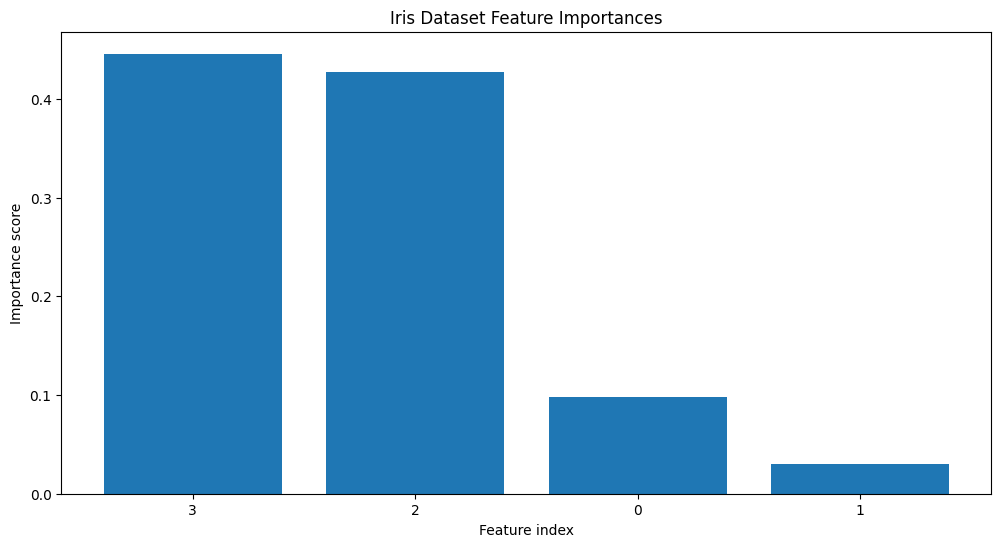

In [40]:


# plot random forest feature importance for iris dataset
import matplotlib.pyplot as plt
import numpy as np
feature_importances = iris_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Iris Dataset Feature Importances')
plt.bar(range(iris_training_data.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(iris_training_data.shape[1]), indices)
plt.xlabel('Feature index')
plt.ylabel('Importance score')
plt.show()


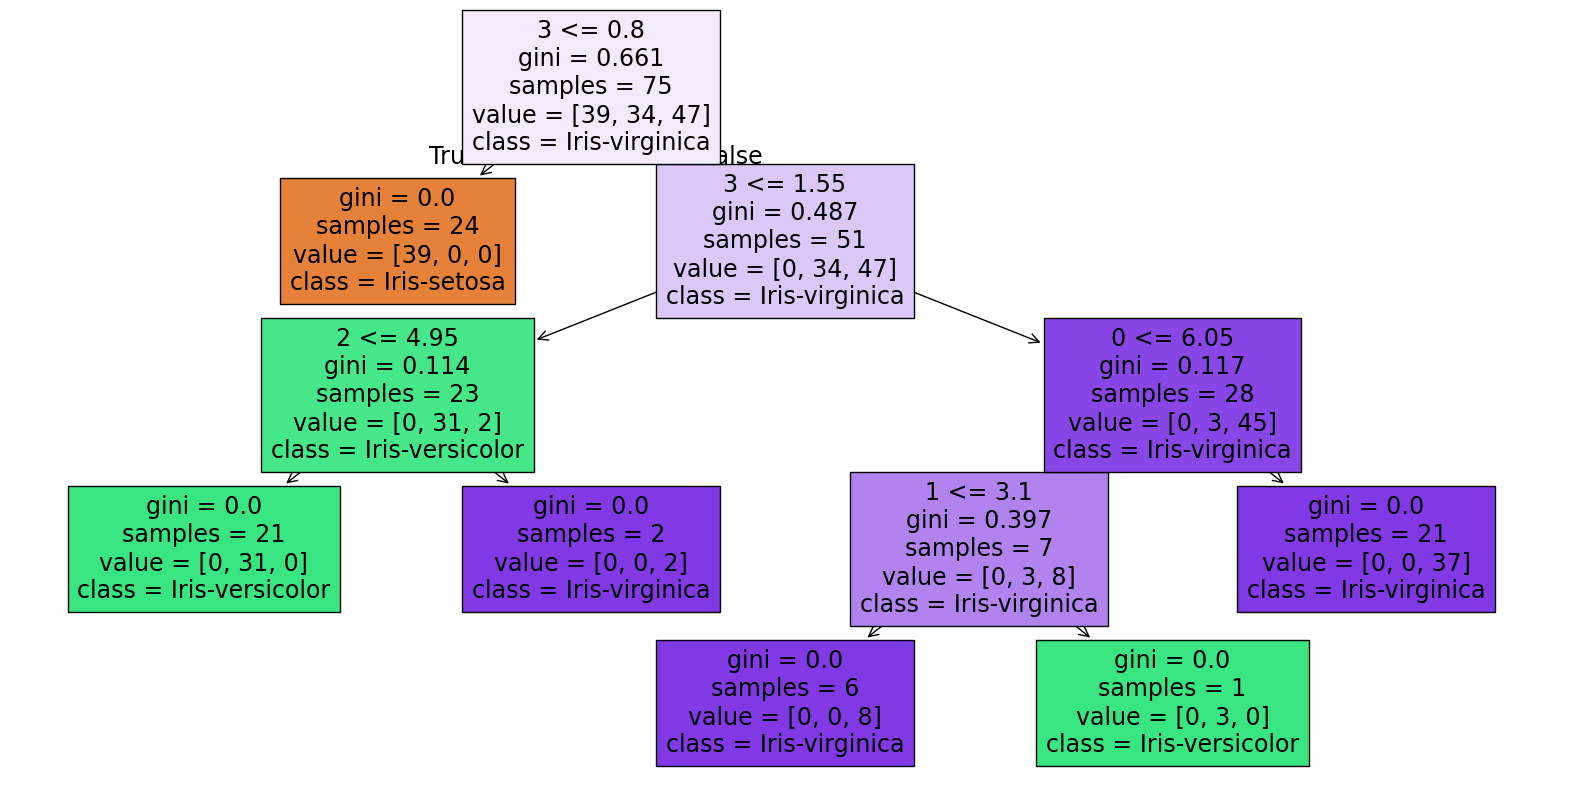

In [41]:
# plot the tree decision from random forest for iris dataset
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(iris_rf.estimators_[0], filled=True, feature_names=[str(i) for i in range(iris_training_data.shape[1])], class_names=iris_labels.unique())
plt.show()

In [42]:
# Use random forest on breast cancer dataset
start_time = time.time()
bc_rf = RandomForestClassifier()
bc_rf.fit(bc_X_train, bc_y_train)
training_time = time.time() - start_time
print(f'Breast cancer dataset Random Forest training time: {training_time} seconds')
# Evaluate on test set
start_time = time.time()
bc_y_pred_rf = bc_rf.predict(bc_X_test)
evaluation_time = time.time() - start_time
print(f'Breast cancer dataset Random Forest evaluation time: {evaluation_time} seconds')
print('Breast cancer dataset Random Forest classification report:')
print(classification_report(bc_y_test, bc_y_pred_rf))
# print accuracy
bc_accuracy_rf = accuracy_score(bc_y_test, bc_y_pred_rf)
print(f'Breast cancer dataset Random Forest accuracy: {bc_accuracy_rf}')


Breast cancer dataset Random Forest training time: 0.2141115665435791 seconds
Breast cancer dataset Random Forest evaluation time: 0.006395816802978516 seconds
Breast cancer dataset Random Forest classification report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Breast cancer dataset Random Forest accuracy: 0.9649122807017544


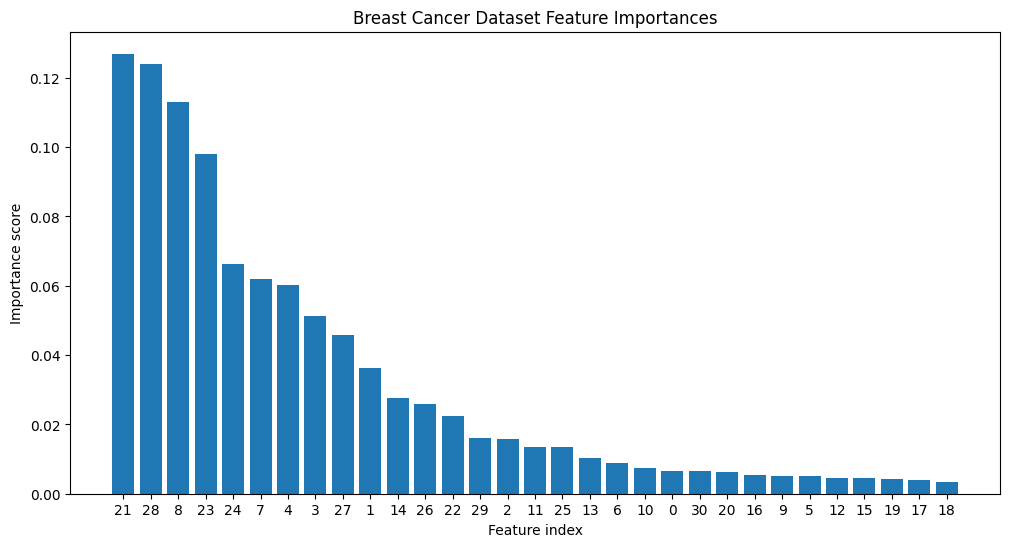

In [43]:


# plot random forest feature importance for breast cancer dataset
import matplotlib.pyplot as plt
import numpy as np
feature_importances = bc_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Breast Cancer Dataset Feature Importances')
plt.bar(range(bc_training_data.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(bc_training_data.shape[1]), indices)
plt.xlabel('Feature index')
plt.ylabel('Importance score')
plt.show()


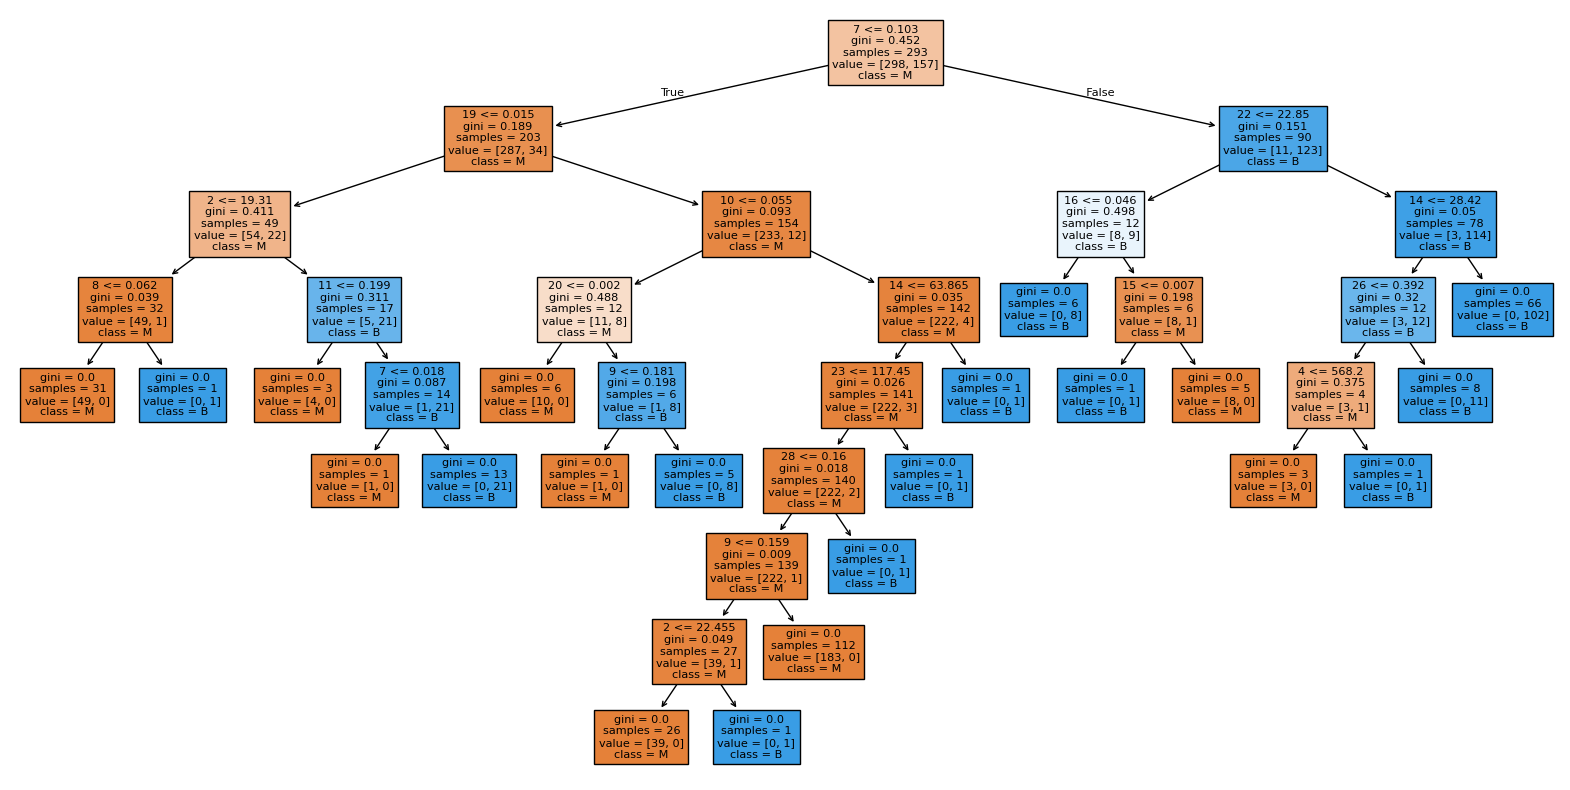

In [44]:
# plot the tree decision from random forest
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(bc_rf.estimators_[0], filled=True, feature_names=[str(i) for i in range(bc_training_data.shape[1])], class_names=bc_labels.unique())
plt.show()